# 12 - Mathematical Models for Time Series

## Aufgabe 12.3

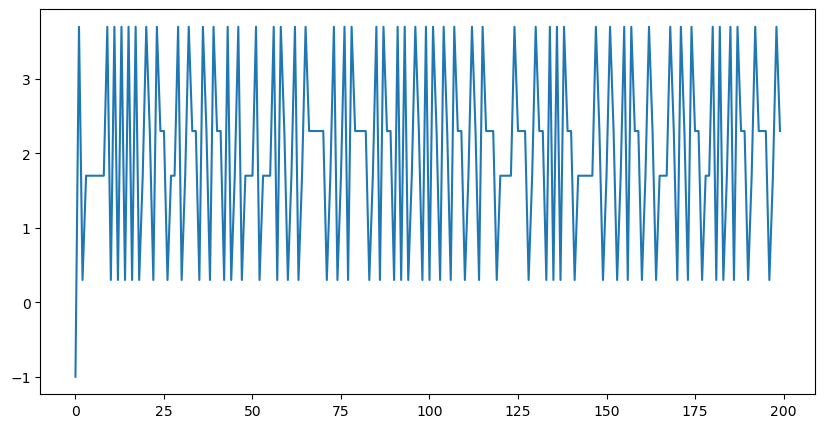

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

nsamp = 200
# Create the process D_k
D = 2 * (np.random.binomial(size=nsamp, n=1, p=0.5) - 0.5)
# Create the process X_k
X = np.zeros(nsamp)
X[0] = -1

a = 2
b = -0.7
for k in range(1, nsamp):
    X[k] = a + D[k] + b * D[k-1]
    
fig = plt.figure(figsize=(10, 5))
plt.plot(X, label='X_k')
plt.show()

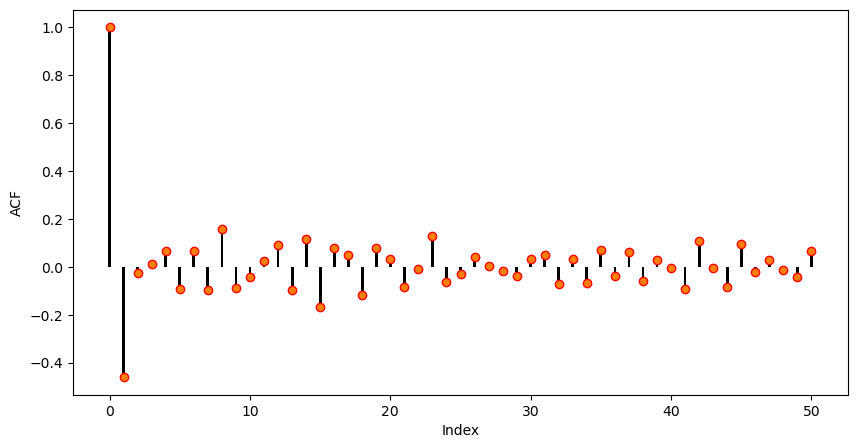

In [ ]:
# 12.3 b) correlogram lag 50

from statsmodels.tsa.stattools import acf
lag = 50
ac = acf(X, fft=False, nlags=lag)
# Plot
x = np.arange(lag + 1)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plt.bar(x, ac, width=0.2, color="black")
plt.plot(x, ac, "ro", markerfacecolor="C1")
plt.xlabel("Index")
plt.ylabel("ACF")
plt.show()


In [11]:
# 12.3 c) 
rho_1 = np.round(-0.7 / (1 + (-0.7) **2), 2)
rho_1_hat = np.round(ac[1], 2)
print(rho_1, rho_1_hat)


-0.47 -0.46


## Aufgabe 12.4

In [ ]:
# 12.4 a) Load file
import pandas as pd
# Load data
global_temp = pd.read_csv('data/global_temp.csv')

# Convert global_temp to Datetime Format
global_temp["Zeit"] = pd.to_datetime(global_temp["Zeit"])
# Create pandas DateTimeIndex
dtindex = pd.DatetimeIndex(data=global_temp["Zeit"], freq='infer')
# Set as Index
global_temp.set_index(dtindex, inplace=True)
global_temp.drop("Zeit", axis=1, inplace=True)

global_temp.head()

,anomalies
Zeit,
1850-01-01,-3.105
1850-02-01,0.632
1850-03-01,-1.336
1850-04-01,-1.436
1850-05-01,-1.052


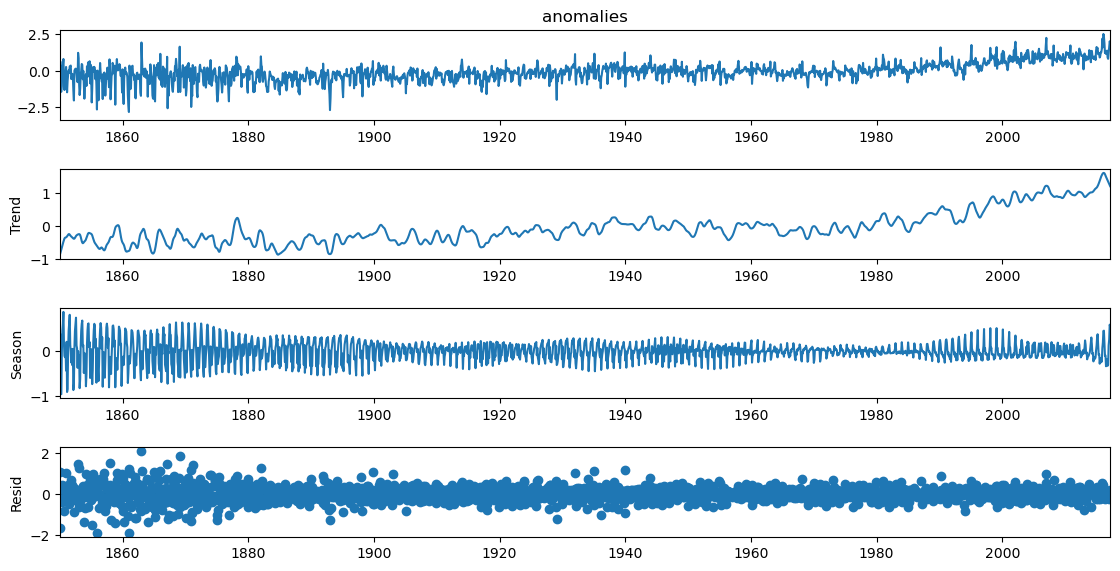

In [20]:
# 12.4 b) STL decomposition
from statsmodels.tsa.seasonal import STL
# Decomposition on log-model using STL
decomp = STL(global_temp["anomalies"], seasonal=13)
decomp = decomp.fit()
# Plot
fig = decomp.plot()
fig.set_size_inches(12, 6)
plt.show()

Text(0.5, 0, 'Index')

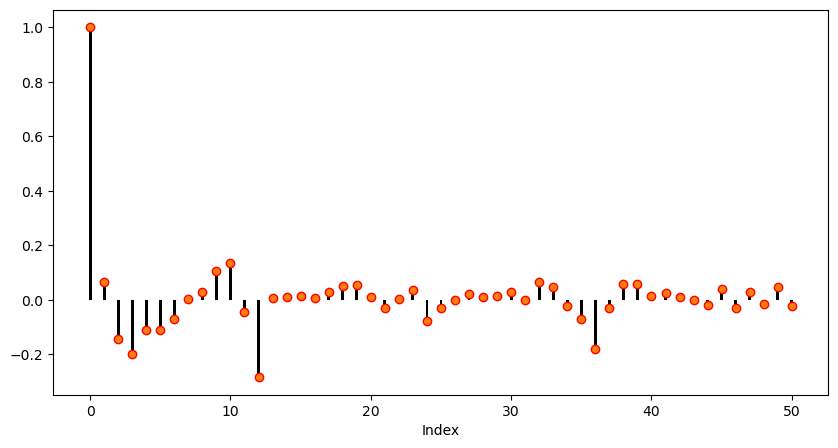

In [ ]:
# 12.4 c) stationarity test

from statsmodels.tsa.stattools import acf
lag = 50
ac = acf(global_temp["anomalies"], fft=False, nlags=lag)

# Plot
rem = decomp.resid
ac = acf(rem, fft=False, nlags = lag)
# Plot correlogram
# Plot
x = np.arange(lag + 1)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plt.bar(x, ac, width=0.2, color="black")
plt.plot(x, ac, "ro", markerfacecolor="C1")
plt.xlabel("Index")

# no significant correlation